First note that our peak temperature is low relative to Nordhaus BAU

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


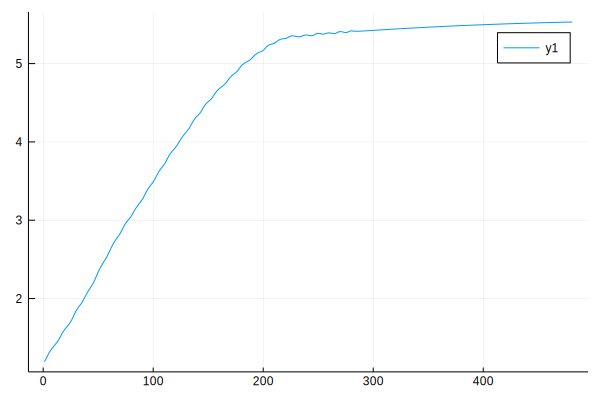

In [1]:
using Plots
include("DICEFARM_annual.jl")
m = create_dice_farm()
run(m)
TwentyTwenty = 2020-1764
plot(m[:co2_cycle, :T][TwentyTwenty:end])

Now I'll compute the SCC as Nordhaus does: change in welfare from an emissions pulse in 2020 divided by change in welfare from a dollar increase in consumption. In other words: how many dollar changes equals the welfare change from the emissions pulse.

In [31]:
Baseline = create_dice_farm()
run(Baseline)
W0 = Baseline[:welfare, :UTILITY]

MargCons = create_dice_farm()
set_param!(MargCons, :neteconomy, :CEQ, 1e-9)  #drop cons by 1000 globally (1e-9 trillions)
run(MargCons)
W1 = MargCons[:welfare, :UTILITY]
dWdC = W0 - W1  #per thousand dollars

#hit with CO2 pulse of 1000 tonnes
MargCO2 = create_dice_farm()
pulse = zeros(length(MargCons[:emissions, :CO2Marg]))
pulse[6] = 1e-6  #thousand tons is 1e-6 gigatonnes; period 6 is 2020 for this variable
set_param!(MargCO2, :emissions, :CO2Marg, pulse)
run(MargCO2)
dWdE = W0 - MargCO2[:welfare, :UTILITY]
SCC = dWdE/dWdC  #Since both are scaled by 1000 (1000 dollars and 1000 tonnes this should be right)
println("Estimated SCC in our model is $SCC using a Consumption Equivalent Losses Methodology")

Estimated SCC in our model is 26.490909090909092 using a Consumption Equivalent Losses Methodology


Ok now let me try it by computing discounted consumption losses

In [35]:
ConsBaseline = 1e12*Baseline[:neteconomy, :C]
ConsCO2Pulse = 1e12*MargCO2[:neteconomy, :C]    #Model with 1000 tonne pulse of CO2
DCons = ConsBaseline[2020-1764:end]-ConsCO2Pulse[2020-1764:end]
d = .026 #discount rate (eyeballed from PNAS 2017 paper)
rr = ones(length(DCons))
for i = 2:length(rr)
   rr[i] = rr[i-1]*(1-d) 
end
DCons
SCC2 = sum(rr.*DCons)/1000  #Hit the model with a 1000 tonne pulse to make sure it picked up the dynamics
println("The SCC using a sum of discounted consumption is $SCC2")

The SCC using a sum of discounted consumption is 75.00489959970234


In [37]:
using MimiDICE2016

ArgumentError: ArgumentError: Package MimiDICE2016 not found in current path:
- Run `import Pkg; Pkg.add("MimiDICE2016")` to install the MimiDICE2016 package.
